# Predictive Dashboard - Projet Assurance

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data_train = "/content/drive/My Drive/train.csv"

In [44]:
data_test = "/content/drive/My Drive/test.csv"

In [31]:
# bibliothèques necessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [32]:
# le style des graphiques
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Exploration des données

In [45]:
# data loading
df_train = pd.read_csv(data_train)
df_test = pd.read_csv(data_test)

In [34]:
# Affichons les premieres lignes
print("Aperçu des données d'entrainement:")
display(df_train.head())

Aperçu des données d'entrainement:


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [35]:
# Infos susr les colonnes
print("\nInformations sur les colonnes:")
df_train.info()


Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 n

In [36]:
# Statistiques descriptives
print("\nStatistiques descriptives:")
display(df_train.describe())


Statistiques descriptives:


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### on observe des (-1) pour certaines variables au niveau du minimum. Quand meme un peu speciale.

In [37]:
# Distribution de la variable cible
print("\nDistribution de la variable cible:")
target_counts = df_train['target'].value_counts()
print(target_counts)
print(f"Pourcentage de la classe 1: {target_counts[1] / len(df_train) * 100:.2f}%")


Distribution de la variable cible:
target
0    573518
1     21694
Name: count, dtype: int64
Pourcentage de la classe 1: 3.64%


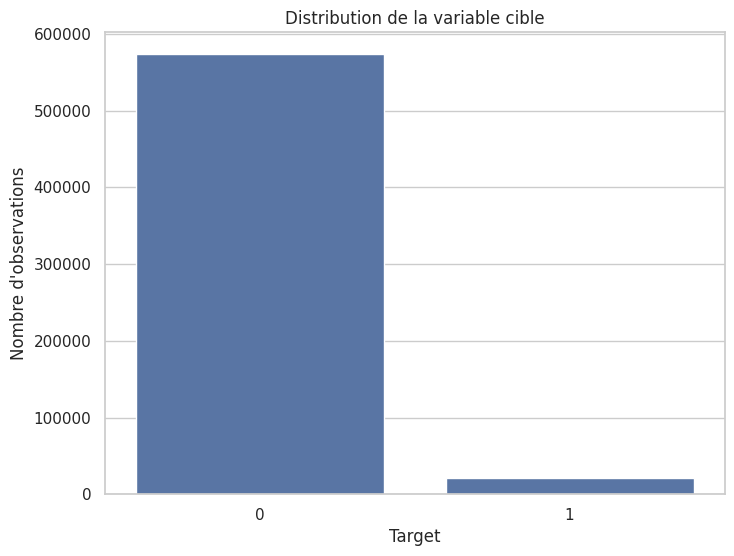

In [38]:
# Visualisation de la distribution de la variable cible
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_train)
plt.title('Distribution de la variable cible')
plt.xlabel('Target')
plt.ylabel('Nombre d\'observations')
plt.show()

#### On observe un deséquilibre des classes très prononcé

In [39]:
# Analyse des valeurs manquantes
print("\nAnalyse des valeurs manquantes:")
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Valeurs manquantes': missing_values,
                          'Pourcentage (%)': missing_percentage})
display(missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Pourcentage (%)', ascending=False))



Analyse des valeurs manquantes:


,Valeurs manquantes,Pourcentage (%)


### aucune donnée manquante surement que les données ont été traité avant car je les ai pris sur Kaggle

In [40]:
# Suppression de la colonne 'id' pour l'analyse
train_data_sans_id = df_train.drop(columns=['id'])
# Vérification du nouveau dataframe
print("Dimensions après suppression de l'id:", train_data_sans_id.shape)
print("Colonnes restantes:", train_data_sans_id.columns.tolist()[:5], "...")

Dimensions après suppression de l'id: (595212, 58)
Colonnes restantes: ['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat'] ...


##  Analyse des corrélations entre les variables

In [41]:
# Sélection unique des colonnes numériques pour la matrice de corrélation
numeric_columns = train_data_sans_id.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train_data_sans_id[numeric_columns].corr()


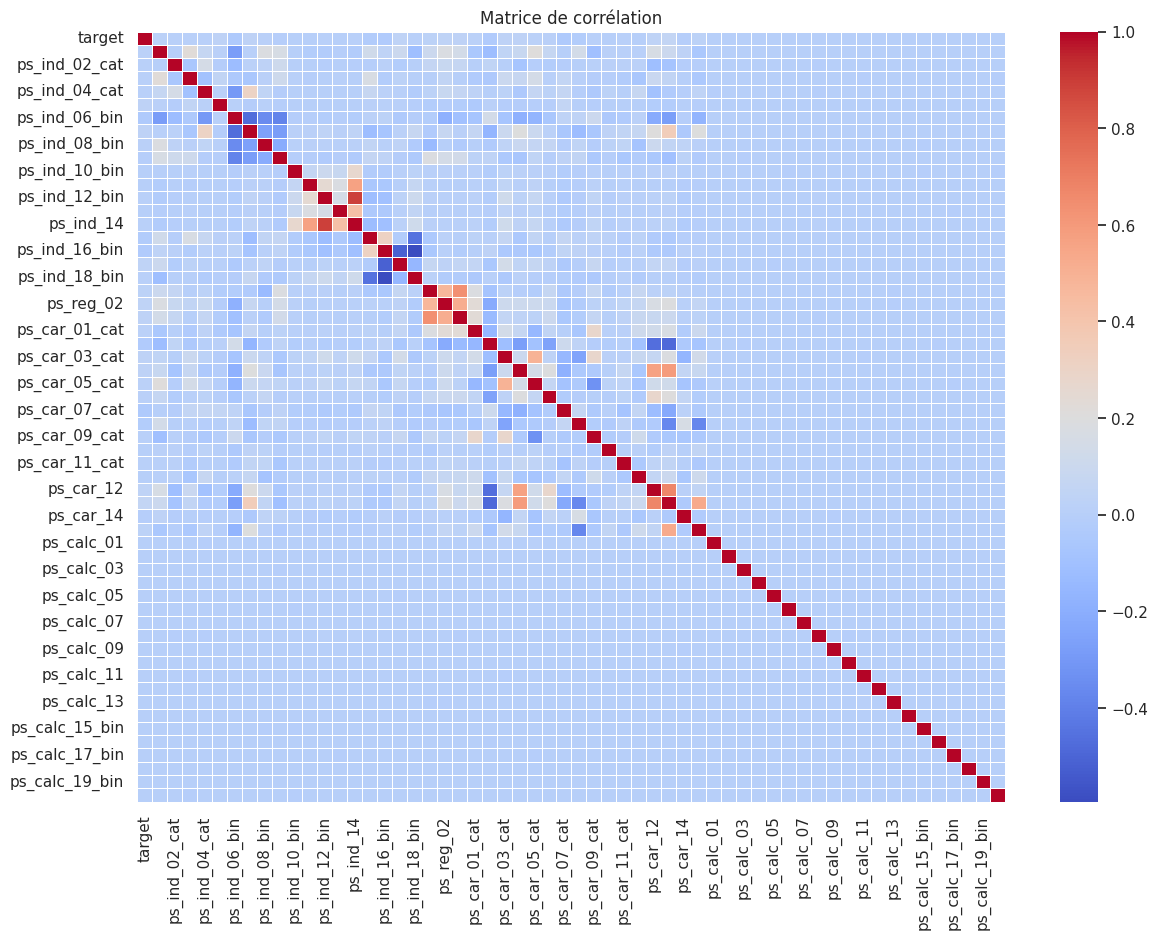

In [42]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#### Cette matrice de correlation est difficile à observer. Essayons d'autre technique plus clair et simple.

Variables les plus corrélées avec la cible:
target           1.000000
ps_car_13        0.053899
ps_car_12        0.038790
ps_ind_17_bin    0.037053
ps_reg_02        0.034800
ps_ind_07_bin    0.034218
ps_car_04_cat    0.032900
ps_car_03_cat    0.032401
ps_reg_03        0.030888
ps_ind_05_cat    0.029165
Name: target, dtype: float64

Variables les moins corrélées avec la cible:
ps_car_11        -0.001213
ps_calc_19_bin   -0.001744
ps_car_14        -0.004474
ps_ind_09_bin    -0.008237
ps_car_08_cat    -0.020342
ps_ind_15        -0.021506
ps_ind_16_bin    -0.027778
ps_car_02_cat    -0.031534
ps_ind_06_bin    -0.034017
ps_car_07_cat    -0.036395
Name: target, dtype: float64


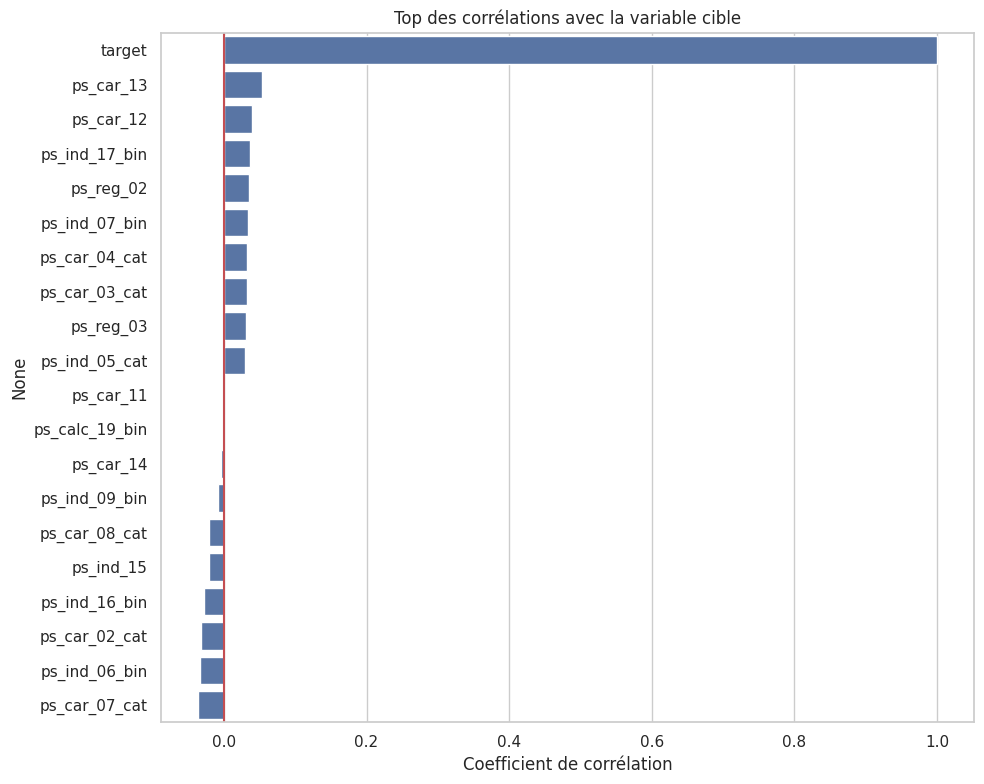

In [43]:
# Extraction des corrélations avec la variable cible
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print("Variables les plus corrélées avec la cible:")
print(target_correlations.head(10))  # Top 10 des corrélations positives
print("\nVariables les moins corrélées avec la cible:")
print(target_correlations.tail(10))  # Top 10 des corrélations négatives

# Visualisation des corrélations avec la cible
plt.figure(figsize=(10, 8))
top_features = pd.concat([target_correlations.head(10), target_correlations.tail(10)])
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top des corrélations avec la variable cible')
plt.xlabel('Coefficient de corrélation')
plt.axvline(x=0, color='r', linestyle='-')
plt.tight_layout()
plt.show()

## Préparation des données

In [46]:
 # Séparation des caractéristiques et de la cible

X_train = df_train.drop(columns=['id', 'target'])
y_train = df_train['target']

# Préparation du test set également
X_test = df_test.drop(columns=['id'])

# Gestion du déséquilibre
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [47]:
# Création et entraînement du modèle random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Entraînement sur les données rééquilibrées
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [48]:
# Évaluation sur un sous-ensemble du train (validation)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Score AUC moyen en validation croisée: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Score AUC moyen en validation croisée: 0.5863 ± 0.0025


In [49]:
# Importance des variables
importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 des variables les plus importantes selon le modèle:")
print(importance.head(10))


Top 10 des variables les plus importantes selon le modèle:
          Variable  Importance
18       ps_reg_01    0.060589
20       ps_reg_03    0.055847
19       ps_reg_02    0.051526
5    ps_ind_06_bin    0.045639
8    ps_ind_09_bin    0.041443
7    ps_ind_08_bin    0.034344
6    ps_ind_07_bin    0.032979
25   ps_car_05_cat    0.031846
54  ps_calc_18_bin    0.031283
55  ps_calc_19_bin    0.030041


In [50]:
# XGBoost avec données rééquilibrées (SMOTE)
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Création et entraînement du modèle XGBoost sur les données SMOTE
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42
)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Évaluation sur les données originales pour une comparaison équitable
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"XGBoost - Score AUC moyen en validation croisée: {xgb_cv_scores.mean():.4f} ± {xgb_cv_scores.std():.4f}")


XGBoost - Score AUC moyen en validation croisée: 0.6388 ± 0.0023


In [51]:
# Importance des variables
xgb_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 des variables les plus importantes selon XGBoost:")
print(xgb_importance.head(10))


Top 10 des variables les plus importantes selon XGBoost:
          Variable  Importance
16   ps_ind_17_bin    0.116046
56  ps_calc_20_bin    0.066647
7    ps_ind_08_bin    0.065515
51  ps_calc_15_bin    0.061605
54  ps_calc_18_bin    0.058575
6    ps_ind_07_bin    0.053827
17   ps_ind_18_bin    0.044305
39      ps_calc_03    0.041269
55  ps_calc_19_bin    0.038703
37      ps_calc_01    0.037799


In [52]:
# Gradient Boosting avec données rééquilibrées
from sklearn.ensemble import GradientBoostingClassifier

# Création et entraînement du modèle Gradient Boosting sur les données SMOTE
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_resampled, y_train_resampled)

# Évaluation sur les données originales
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Gradient Boosting - Score AUC moyen en validation croisée: {gb_cv_scores.mean():.4f} ± {gb_cv_scores.std():.4f}")

# Importance des variables
gb_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 des variables les plus importantes selon Gradient Boosting:")
print(gb_importance.head(10))

Gradient Boosting - Score AUC moyen en validation croisée: 0.6389 ± 0.0027

Top 10 des variables les plus importantes selon Gradient Boosting:
         Variable  Importance
7   ps_ind_08_bin    0.131255
39     ps_calc_03    0.078589
6   ps_ind_07_bin    0.066393
38     ps_calc_02    0.059913
8   ps_ind_09_bin    0.059897
5   ps_ind_06_bin    0.057106
19      ps_reg_02    0.056258
18      ps_reg_01    0.050231
37     ps_calc_01    0.049729
20      ps_reg_03    0.043800


## Comparaison des performances des modèles

In [54]:

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, precision_recall_curve, auc

# Stockage des scores et des objets modèles
models = {
    'Random Forest': model,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model
}

In [56]:
# Récupération des scores AUC
scores = {
    'Random Forest': cv_scores,
    'XGBoost': xgb_cv_scores,
    'Gradient Boosting': gb_cv_scores
}

In [57]:
# Création d'un DataFrame pour comparer les performances
results_df = pd.DataFrame({
    'Modèle': list(scores.keys()),
    'AUC moyen': [score.mean() for score in scores.values()],
    'Écart-type': [score.std() for score in scores.values()]
})

# Tri par performance décroissante
results_df = results_df.sort_values('AUC moyen', ascending=False)
print("Comparaison des performances des modèles:")
print(results_df)

Comparaison des performances des modèles:
              Modèle  AUC moyen  Écart-type
2  Gradient Boosting   0.638917    0.002655
1            XGBoost   0.638787    0.002274
0      Random Forest   0.586312    0.002535


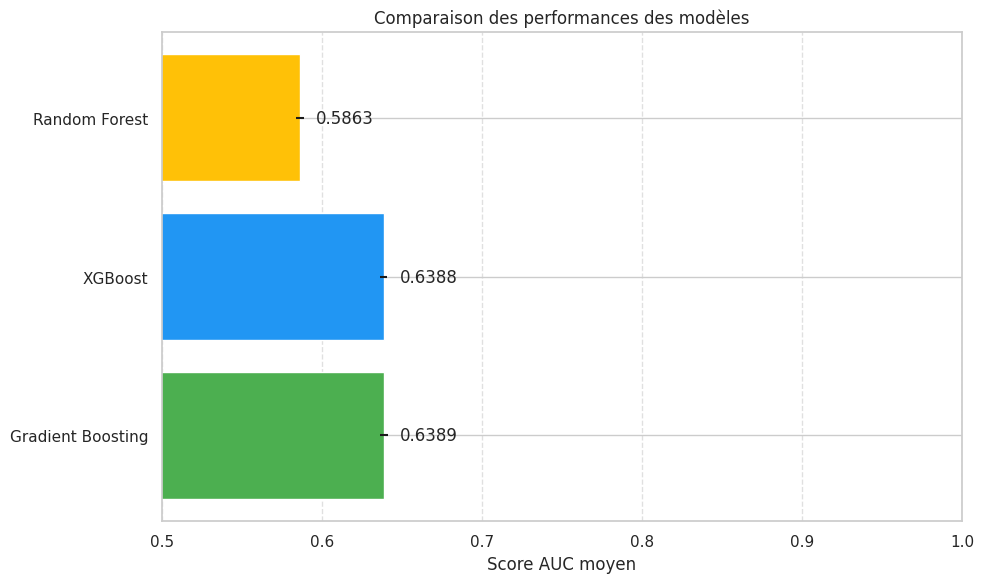

In [58]:
# Visualisation comparative
plt.figure(figsize=(10, 6))
plt.barh(results_df['Modèle'], results_df['AUC moyen'], xerr=results_df['Écart-type'],
         color=['#4CAF50', '#2196F3', '#FFC107'])
plt.xlim(0.5, 1.0)
plt.xlabel('Score AUC moyen')
plt.title('Comparaison des performances des modèles')
plt.grid(axis='x', linestyle='--', alpha=0.6)
for i, v in enumerate(results_df['AUC moyen']):
    plt.text(v + 0.01, i, f"{v:.4f}", va='center')
plt.tight_layout()
plt.show()

In [59]:
# Sélection du meilleur modèle
best_model_name = results_df.iloc[0]['Modèle']
best_model = models[best_model_name]
print(f"\nLe meilleur modèle est: {best_model_name} avec un score AUC de {results_df.iloc[0]['AUC moyen']:.4f}")



Le meilleur modèle est: Gradient Boosting avec un score AUC de 0.6389


In [60]:
# Obtention des prédictions avec le meilleur modèle
y_pred_proba = best_model.predict_proba(X_train)[:, 1]  # Probabilités de la classe positive
y_pred = best_model.predict(X_train)  # Prédictions binaires


Matrice de confusion du meilleur modèle:
[[573284    234]
 [ 21671     23]]

Rapport de classification:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    573518
           1       0.09      0.00      0.00     21694

    accuracy                           0.96    595212
   macro avg       0.53      0.50      0.49    595212
weighted avg       0.93      0.96      0.95    595212



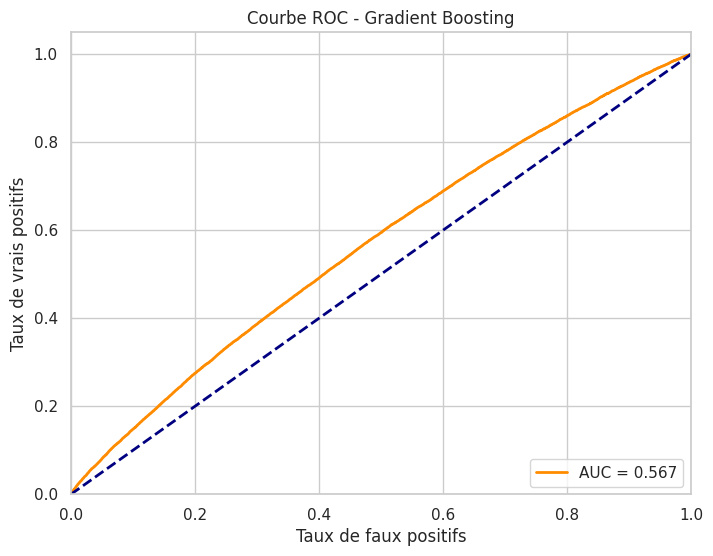

In [61]:
# Évaluation détaillée du meilleur modèle
print("\nMatrice de confusion du meilleur modèle:")
print(confusion_matrix(y_train, y_pred))

print("\nRapport de classification:")
print(classification_report(y_train, y_pred))

# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title(f'Courbe ROC - {best_model_name}')
plt.legend(loc="lower right")
plt.show()

#### On observe un faible taux de précision pour la classe 1. C'est un problème critique qui pourrait conduire à une grave sous-estimation des réserves si nous n'y prêtons pas attention.
#### Pour remedier à cela, nous utilisons la Pondération des probabilités des trois modèles

## Pondération des probabilités des trois modèles

In [68]:
# (en donnant plus de poids aux modèles les plus performants)
poids_rf = 0.2  # Random Forest (moins performant)
poids_xgb = 0.4  # XGBoost
poids_gb = 0.4  # Gradient Boosting (légèrement meilleur)

# Calcul des probabilités d'ensemble
probas_ensemble = (poids_rf * model.predict_proba(X_train)[:, 1] +
                  poids_xgb * xgb_model.predict_proba(X_train)[:, 1] +
                  poids_gb * gb_model.predict_proba(X_train)[:, 1])

# Utilisation de ces probabilités pour le calcul des réserves
cout_moyen_sinistre = 10000
reserve_par_police = probas_ensemble * cout_moyen_sinistre
reserve_totale = reserve_par_police.sum()

## Creation du Dashboard

In [69]:
# Création d'un DataFrame pour le dashboard
dashboard_data = pd.DataFrame({
    'id': X_train.index if hasattr(X_train, 'index') else range(len(X_train)),
    'probabilite_sinistre': probas_ensemble,
    'reserve_estimee': reserve_par_police
})

In [70]:
# Segmentation des polices par niveau de risque
dashboard_data['categorie_risque'] = pd.qcut(
    dashboard_data['probabilite_sinistre'],
    q=[0, 0.6, 0.8, 0.9, 0.95, 1.0],
    labels=['Très faible', 'Faible', 'Moyen', 'Élevé', 'Très élevé']
)

In [71]:
# Analyse des réserves par catégorie de risque
reserves_par_categorie = dashboard_data.groupby('categorie_risque').agg({
    'reserve_estimee': ['sum', 'mean', 'count'],
    'probabilite_sinistre': ['mean', 'min', 'max']
})

print("Répartition des réserves par catégorie de risque:")
print(reserves_par_categorie)

Répartition des réserves par catégorie de risque:
                 reserve_estimee                      probabilite_sinistre  \
                             sum         mean   count                 mean   
categorie_risque                                                             
Très faible         1.458771e+08   408.474023  357127             0.040847   
Faible              1.051087e+08   882.954400  119042             0.088295   
Moyen               7.979581e+07  1340.632956   59521             0.134063   
Élevé               5.383332e+07  1808.854432   29761             0.180885   
Très élevé          7.911300e+07  2658.277631   29761             0.265828   

                                      
                       min       max  
categorie_risque                      
Très faible       0.004566  0.070400  
Faible            0.070400  0.112377  
Moyen             0.112378  0.161525  
Élevé             0.161527  0.204615  
Très élevé        0.204615  0.686053  


<ipython-input-71-d864937f5e0d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reserves_par_categorie = dashboard_data.groupby('categorie_risque').agg({


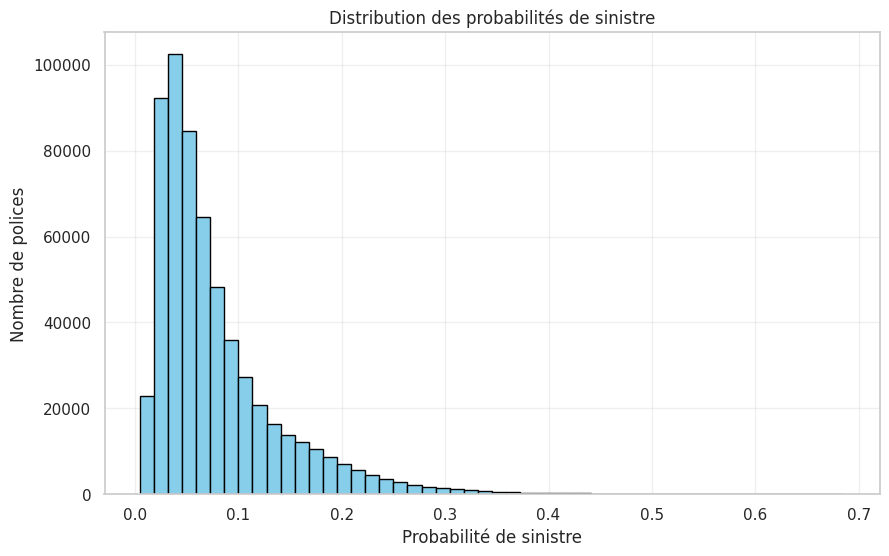

In [72]:
# Visualisation de la distribution des probabilités de sinistre
plt.figure(figsize=(10, 6))
plt.hist(dashboard_data['probabilite_sinistre'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution des probabilités de sinistre')
plt.xlabel('Probabilité de sinistre')
plt.ylabel('Nombre de polices')
plt.grid(alpha=0.3)
plt.show()

<ipython-input-73-539437383dd3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reserves_sum = dashboard_data.groupby('categorie_risque')['reserve_estimee'].sum()


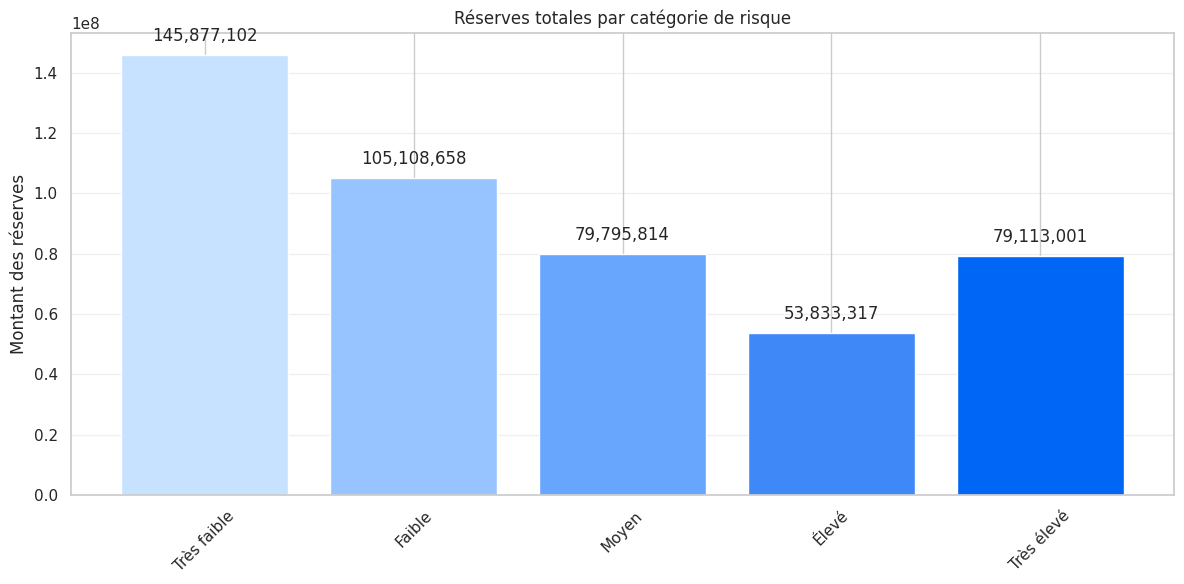

In [73]:
# Visualisation des réserves par catégorie
plt.figure(figsize=(12, 6))
reserves_sum = dashboard_data.groupby('categorie_risque')['reserve_estimee'].sum()
plt.bar(reserves_sum.index, reserves_sum.values, color=['#c6e2ff', '#97c4fe', '#67a6fc', '#3f88f8', '#0066f5'])
plt.title('Réserves totales par catégorie de risque')
plt.ylabel('Montant des réserves')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(reserves_sum):
    plt.text(i, v + 0.01 * reserve_totale, f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

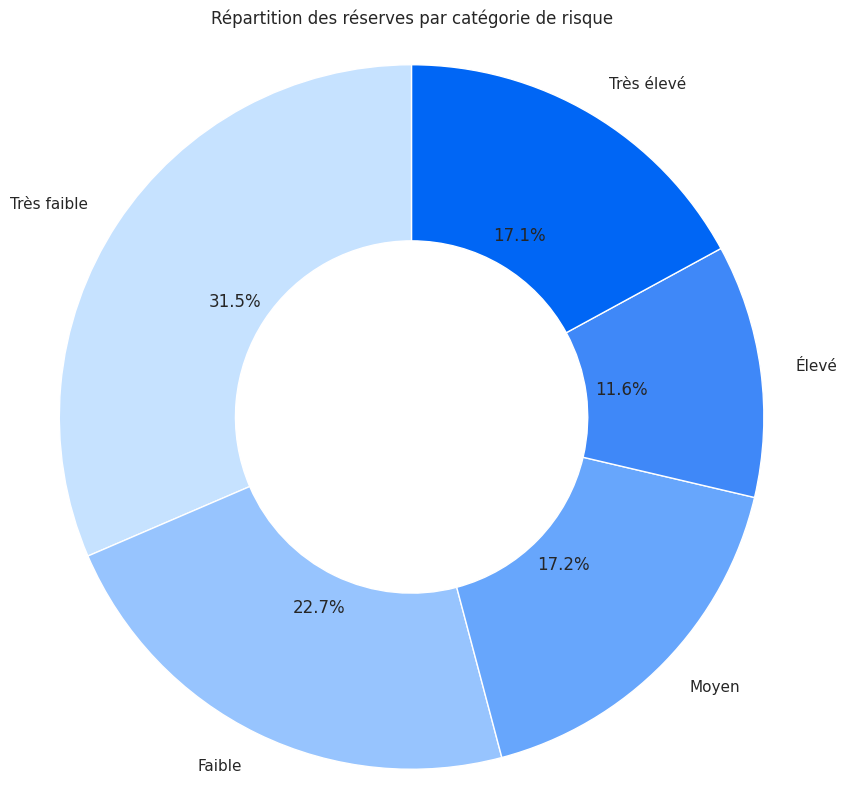

In [74]:
# Création d'un graphique en anneau pour les proportions
plt.figure(figsize=(10, 10))
plt.pie(reserves_sum, labels=reserves_sum.index, autopct='%1.1f%%', startangle=90,
        colors=['#c6e2ff', '#97c4fe', '#67a6fc', '#3f88f8', '#0066f5'],
        wedgeprops=dict(width=0.5, edgecolor='w'))
plt.axis('equal')
plt.title('Répartition des réserves par catégorie de risque')
plt.show()

In [75]:
# Création d'un tableau récapitulatif pour le dashboard
resume_reserves = pd.DataFrame({
    'Catégorie': reserves_sum.index,
    'Montant des réserves': reserves_sum.values,
    'Pourcentage': (reserves_sum / reserve_totale * 100).values,
    'Nombre de polices': dashboard_data.groupby('categorie_risque').size().values
})

print("\nRésumé des réserves pour le dashboard:")
print(resume_reserves)


Résumé des réserves pour le dashboard:
     Catégorie  Montant des réserves  Pourcentage  Nombre de polices
0  Très faible          1.458771e+08    31.457479             357127
1       Faible          1.051087e+08    22.666020             119042
2        Moyen          7.979581e+07    17.207465              59521
3        Élevé          5.383332e+07    11.608816              29761
4   Très élevé          7.911300e+07    17.060220              29761


<ipython-input-75-d1c56e094433>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'Nombre de polices': dashboard_data.groupby('categorie_risque').size().values


In [76]:
# Statistiques globales pour le dashboard
print(f"\nStatistiques globales:")
print(f"Réserve totale estimée: {reserve_totale:,.2f}")
print(f"Nombre total de polices: {len(dashboard_data)}")
print(f"Réserve moyenne par police: {reserve_totale/len(dashboard_data):,.2f}")


Statistiques globales:
Réserve totale estimée: 463,727,891.61
Nombre total de polices: 595212
Réserve moyenne par police: 779.10
